In [2]:
%matplotlib inline
from pylab import *
import cv2

rcParams['figure.figsize'] = 10, 10
from dataset import load_image
import torch
from utils import cuda
from generate_masks import get_model
from albumentations import Compose, Normalize
from albumentations.pytorch.functional import img_to_tensor

In [3]:
def img_transform(p=1):
    return Compose([
        Normalize(p=1)
    ], p=p)


In [4]:
def mask_overlay(image, mask, color=(0, 255, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0    
    img[ind] = weighted_sum[ind]    
    return img

In [5]:
model_path = 'unet16_binary_20/model_0.pt'
model = get_model(model_path, model_type='UNet16', problem_type='binary')

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [57]:
img_file_name = '../InstrumentSegmentation\ScreenshotFine3.png'
#gt_file_name = 'Maskframe004.jpg'

image = load_image(img_file_name)
#gt = cv2.imread(gt_file_name, 0) > 0

image = cv2.resize(image, (512,288))

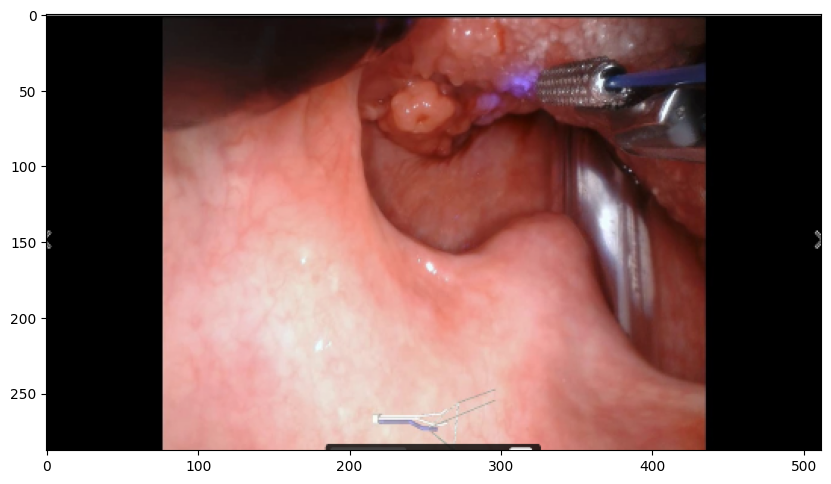

In [58]:
imshow(image)

In [59]:
with torch.no_grad():
    input_image = torch.unsqueeze(img_to_tensor(img_transform(p=1)(image=image)['image']).cuda(), dim=0)

In [60]:
mask = model(input_image)

In [62]:
mask_array = mask.data[0].cpu().numpy()[0]

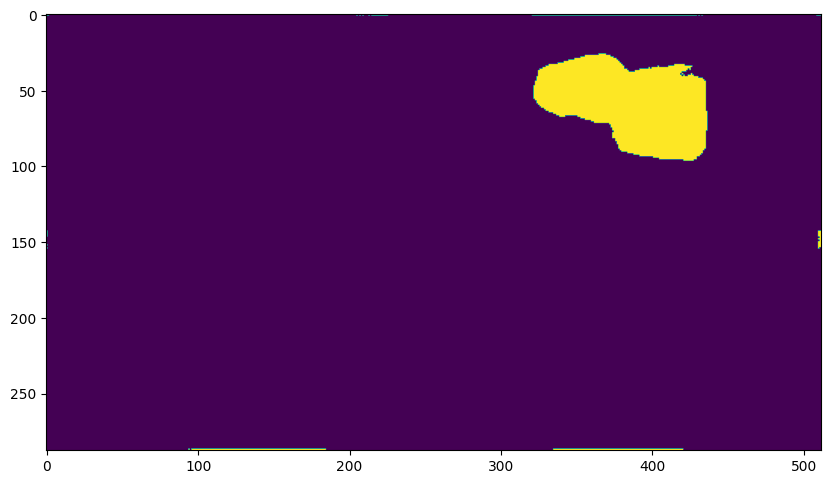

In [66]:
imshow(mask_array > -5)

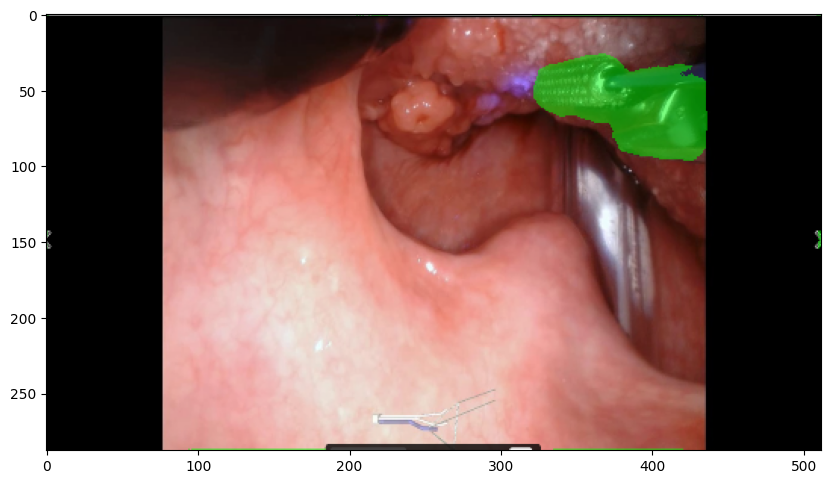

In [67]:
array = imshow(mask_overlay(image, (mask_array > -5).astype(np.uint8)))

In [48]:
import numpy as np 
from PIL import Image as im 
data = im.fromarray(array) 
data.save('gfg_dummy_pic.png')

AttributeError: 'AxesImage' object has no attribute '__array_interface__'